In [1]:
import pandas as pd
from pandas import *
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt
%matplotlib inline
import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error

In [2]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
# test=pd.read_csv('/home/atif/dataset_26_april_3.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
import datetime
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [97]:
# univariate_column_label=['DEWIHOBT9_I0','AEDAHO_T9_V2'] #target is turbine 9's input
univariate_column_label=['DEWIHOBT9_I0','AEWIHO_T9AV2'] #target is turbine 9's output
univariate_data=test_new.iloc[2000:7000][univariate_column_label]
univariate_data=univariate_data.loc[::-1]

In [98]:
univariate_data.head()

,DEWIHOBT9_I0,AEWIHO_T9AV2
dateTime,,
2019-04-06 00:21:00,100.0,76.598087
2019-04-06 00:22:00,100.0,76.358689
2019-04-06 00:23:00,100.0,77.241097
2019-04-06 00:24:00,100.0,77.062413
2019-04-06 00:25:00,100.0,76.297974


In [99]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in univariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  0


In [100]:
if zero_index.size > 0:
    univariate_data_modify = univariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    univariate_data_modify = univariate_data

In [101]:
univariate_data_modify = univariate_data_modify.drop(['DEWIHOBT9_I0'], axis=1)

In [102]:
univariate_data_modify.head()

,AEWIHO_T9AV2
dateTime,
2019-04-06 00:21:00,76.598087
2019-04-06 00:22:00,76.358689
2019-04-06 00:23:00,77.241097
2019-04-06 00:24:00,77.062413
2019-04-06 00:25:00,76.297974


In [103]:
from numpy import nan
univariate_data_drop_zero = univariate_data_modify.replace(0,nan)
univariate_data_drop_zero = univariate_data_drop_zero.dropna(how='any',axis=0)

4999
(4999, 1)
                     AEWIHO_T9AV2
dateTime                         
2019-04-06 00:21:00     76.598087
2019-04-06 00:22:00     76.358689
2019-04-06 00:23:00     77.241097
2019-04-06 00:24:00     77.062413
2019-04-06 00:25:00     76.297974


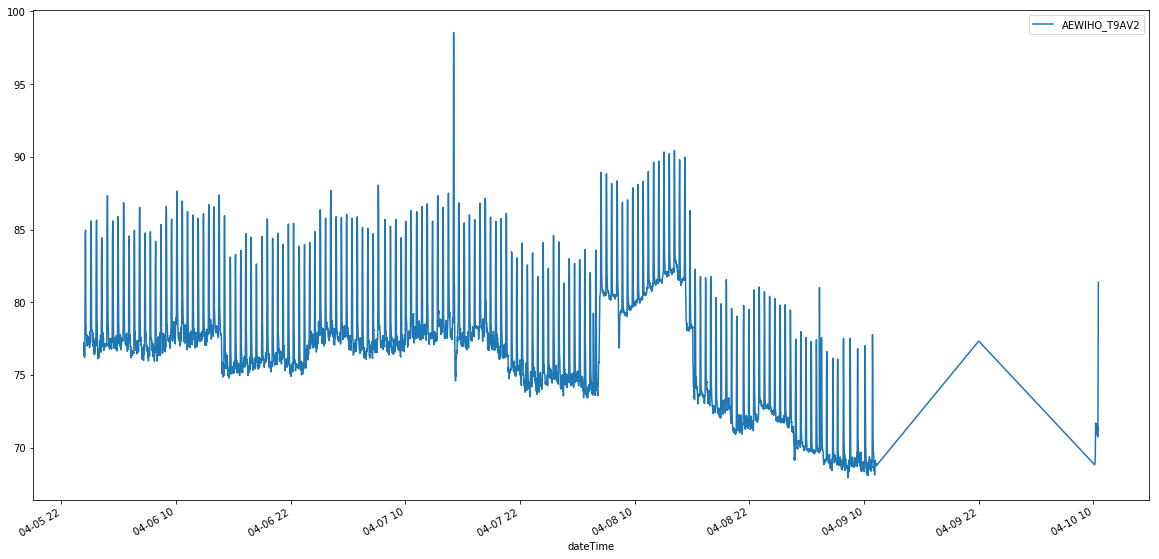

In [104]:
print(univariate_data_drop_zero.size)
print(univariate_data_drop_zero.shape)
print(univariate_data_drop_zero.head())

cx = univariate_data_drop_zero.plot()
# plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [105]:
for my_column_label in univariate_data_drop_zero.columns:
    print(my_column_label)

AEWIHO_T9AV2


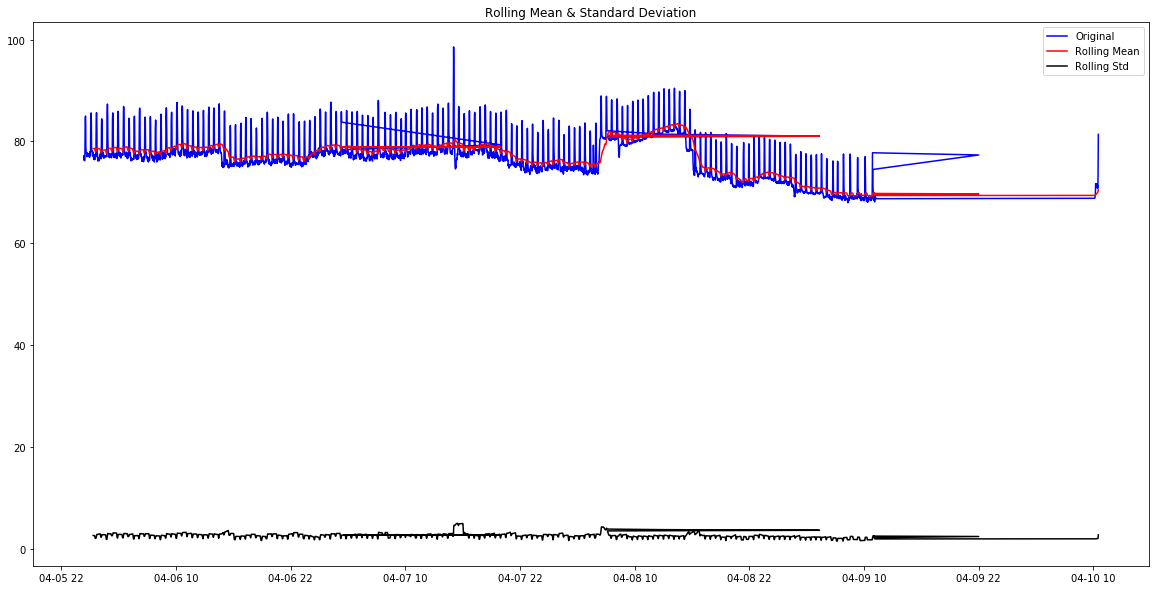

Results of Dickey-Fuller Test:
Test Statistic                   -0.502784
p-value                           0.891472
#Lags Used                       32.000000
Number of Observations Used    4966.000000
Critical Value (1%)              -3.431667
Critical Value (5%)              -2.862122
Critical Value (10%)             -2.567080
dtype: float64


In [106]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries,my_column_label):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
#     rolstd = pd.rolling_std(timeseries, window=12)
    
    n=60
    rolmean = timeseries.rolling(window=n).mean()
    rolstd = timeseries.rolling(window=n).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[my_column_label], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
# adf_test(train['#Passengers'])
adf_test(univariate_data_drop_zero,my_column_label)

                     AEWIHO_T9AV2
dateTime                         
2019-04-06 00:21:00           NaN
2019-04-06 00:22:00     -0.003130
2019-04-06 00:23:00      0.011490
2019-04-06 00:24:00     -0.002316
2019-04-06 00:25:00     -0.009969
                     AEWIHO_T9AV2
dateTime                         
2019-04-06 00:22:00     -0.003130
2019-04-06 00:23:00      0.011490
2019-04-06 00:24:00     -0.002316
2019-04-06 00:25:00     -0.009969
2019-04-06 00:26:00     -0.001172


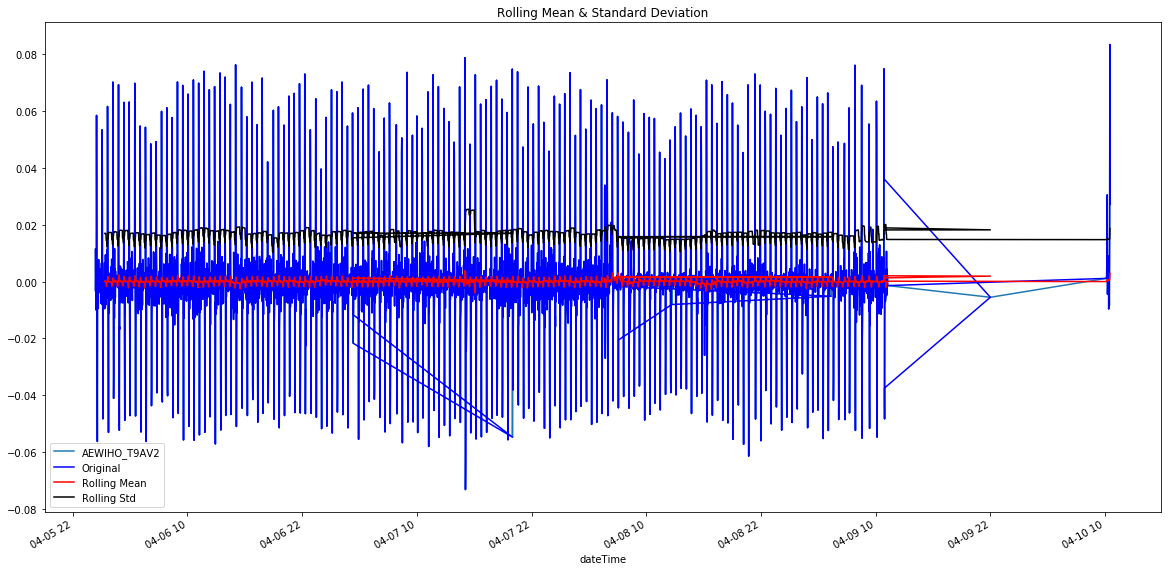

Results of Dickey-Fuller Test:
Test Statistic                  -26.539029
p-value                           0.000000
#Lags Used                       32.000000
Number of Observations Used    4965.000000
Critical Value (1%)              -3.431668
Critical Value (5%)              -2.862122
Critical Value (10%)             -2.567080
dtype: float64


In [107]:
log_univariate_data = np.log(univariate_data_drop_zero)
diff_log_univariate_data = log_univariate_data - log_univariate_data.shift()
diff_log_univariate_data.dropna().plot()

print(diff_log_univariate_data.head())
diff_log_univariate_data.dropna(inplace=True)
print(diff_log_univariate_data.head())


# Now use this diff_log_univariate_data to the adf_test function.

adf_test(diff_log_univariate_data, my_column_label)

In [108]:
print(univariate_data_drop_zero.head())
print(diff_log_univariate_data.head())

print(univariate_data_drop_zero.size)
print(diff_log_univariate_data.size)

                     AEWIHO_T9AV2
dateTime                         
2019-04-06 00:21:00     76.598087
2019-04-06 00:22:00     76.358689
2019-04-06 00:23:00     77.241097
2019-04-06 00:24:00     77.062413
2019-04-06 00:25:00     76.297974
                     AEWIHO_T9AV2
dateTime                         
2019-04-06 00:22:00     -0.003130
2019-04-06 00:23:00      0.011490
2019-04-06 00:24:00     -0.002316
2019-04-06 00:25:00     -0.009969
2019-04-06 00:26:00     -0.001172
4999
4998


In [109]:
# chk = np.exp(log_univariate_data)
# print(type(chk))
# print(chk.head())
# chk.plot()
# plt.show()

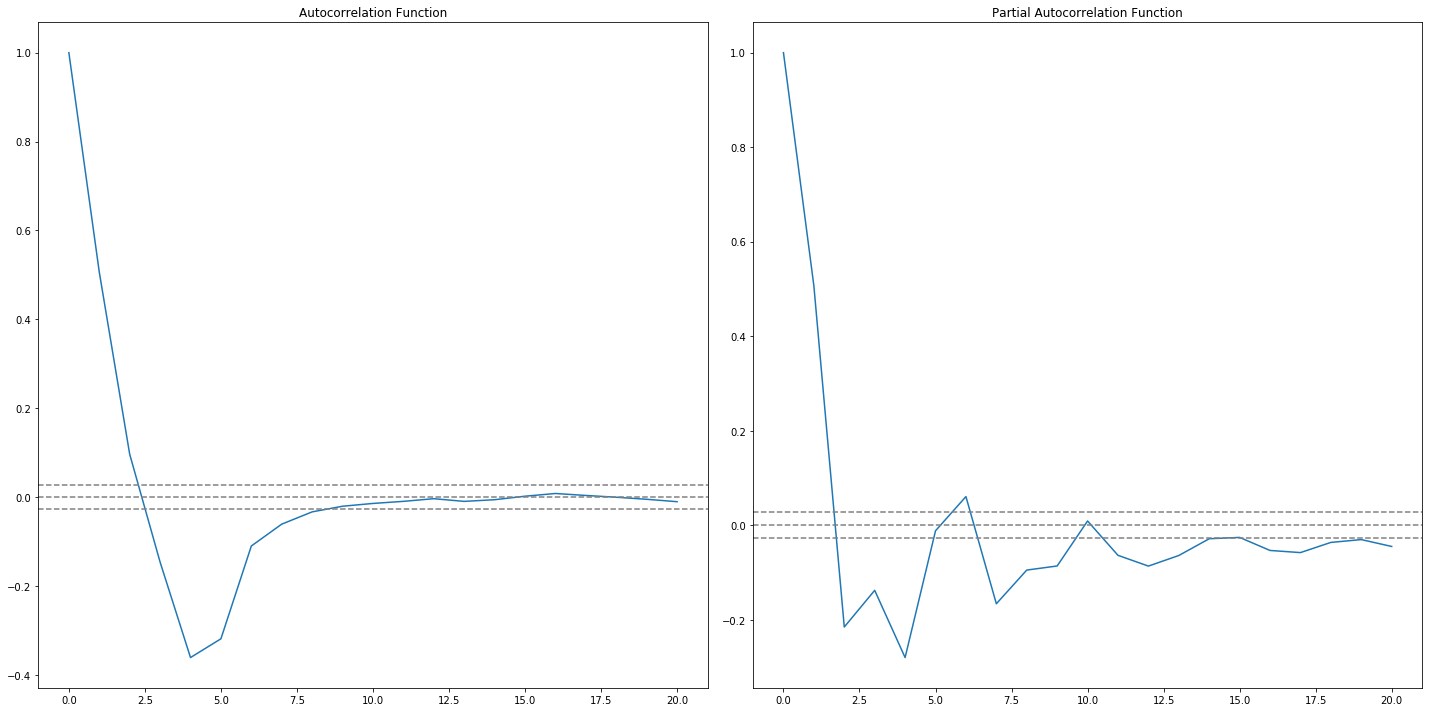

In [110]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(diff_log_univariate_data, nlags=20)
lag_pacf = pacf(diff_log_univariate_data, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_log_univariate_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_log_univariate_data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_log_univariate_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_log_univariate_data)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

plt.show()

C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


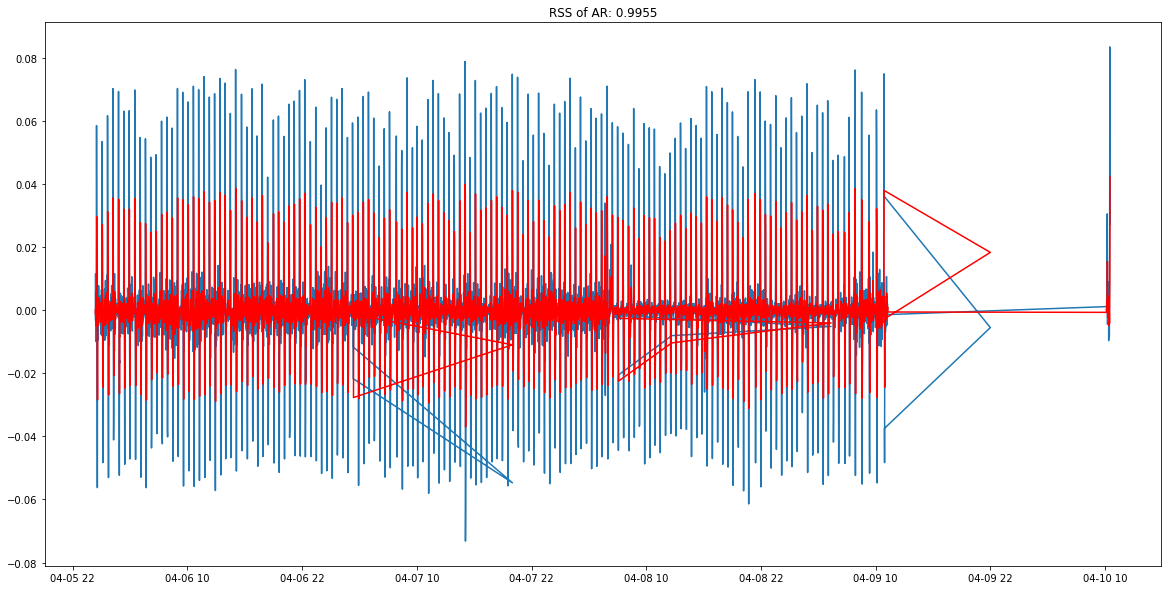

C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


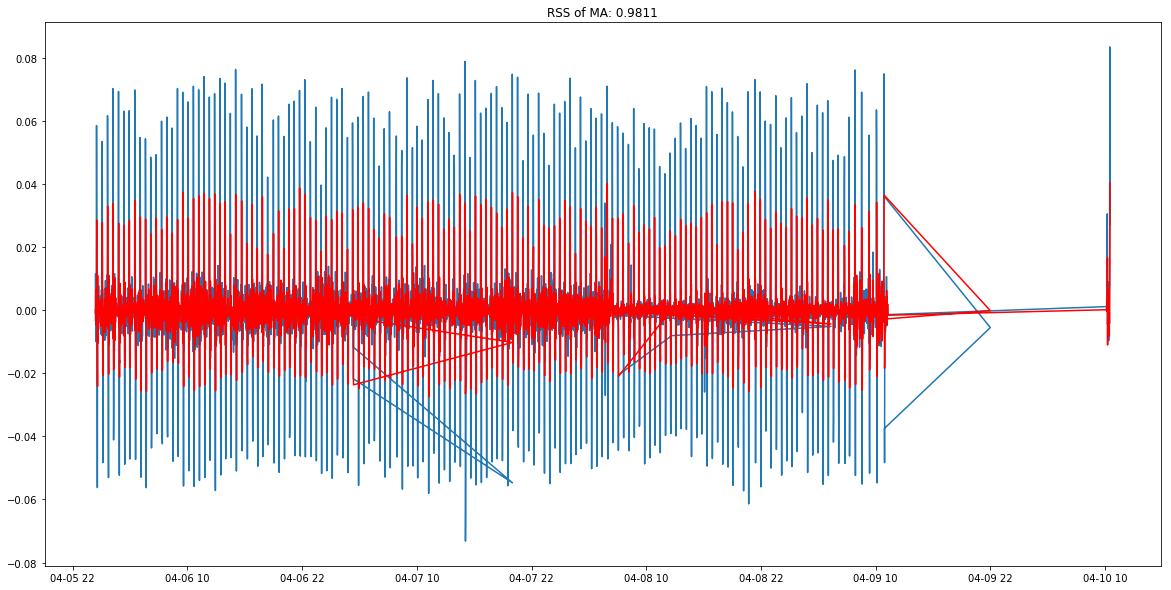

C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


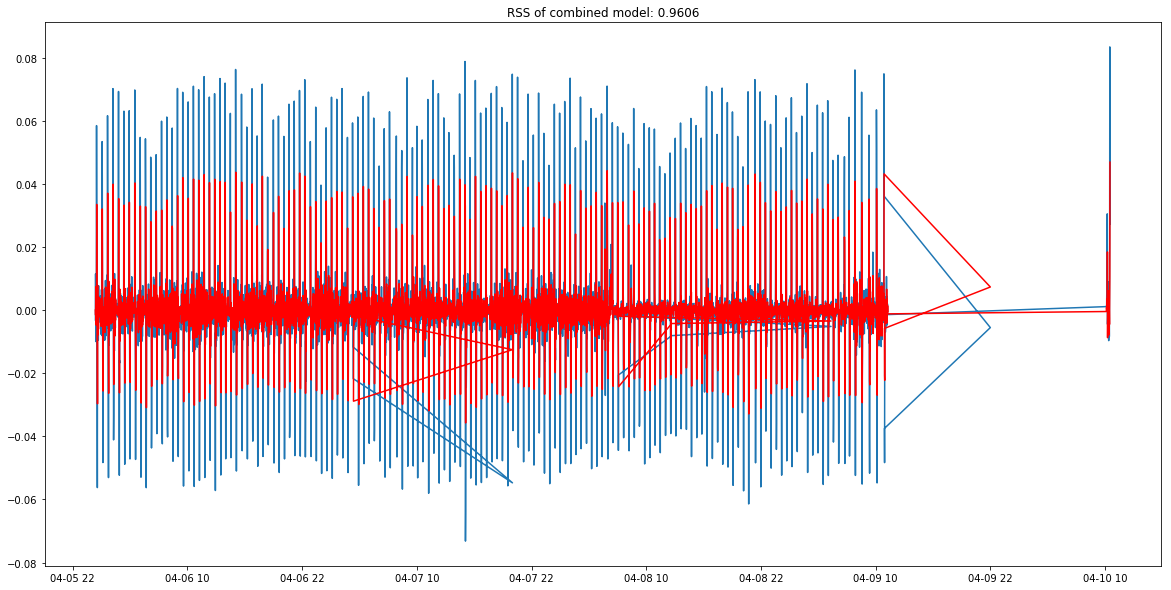

In [111]:
from statsmodels.tsa.arima_model import ARIMA

# AR model

model = ARIMA(log_univariate_data, order=(1, 1, 0))
results_AR = model.fit(disp=-1)  
plt.plot(diff_log_univariate_data)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS of AR: %.4f'% sum((results_AR.fittedvalues - diff_log_univariate_data[my_column_label])**2))
plt.show()
# MA model

model = ARIMA(log_univariate_data, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(diff_log_univariate_data)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS of MA: %.4f'% sum((results_MA.fittedvalues - diff_log_univariate_data[my_column_label])**2))

plt.show()

# combined model

model = ARIMA(log_univariate_data, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(diff_log_univariate_data)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS of combined model: %.4f'% sum((results_ARIMA.fittedvalues - diff_log_univariate_data[my_column_label])**2))
plt.show()

In [112]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

dateTime
2019-04-06 00:22:00    0.000011
2019-04-06 00:23:00   -0.001589
2019-04-06 00:24:00    0.007350
2019-04-06 00:25:00   -0.003849
2019-04-06 00:26:00   -0.004723
dtype: float64


In [113]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

dateTime
2019-04-06 00:22:00    0.000011
2019-04-06 00:23:00   -0.001578
2019-04-06 00:24:00    0.005772
2019-04-06 00:25:00    0.001923
2019-04-06 00:26:00   -0.002800
dtype: float64


In [124]:
predictions_ARIMA_log = pd.Series(log_univariate_data.iloc[0], index=log_univariate_data.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
print(predictions_ARIMA_log.head())

print(type(log_univariate_data))
print(type(predictions_ARIMA_log))
# #['AEDAHO_T9_V2']
# predictions_ARIMA_log = pd.Series(log_univariate_data['AEDAHO_T9_V2'].iloc[0], index=log_univariate_data.index)
# predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
# print(predictions_ARIMA_log.head())

dateTime
2019-04-06 00:21:00         NaN
2019-04-06 00:22:00    0.000011
2019-04-06 00:23:00   -0.001578
2019-04-06 00:24:00    0.005772
2019-04-06 00:25:00    0.001923
dtype: float64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


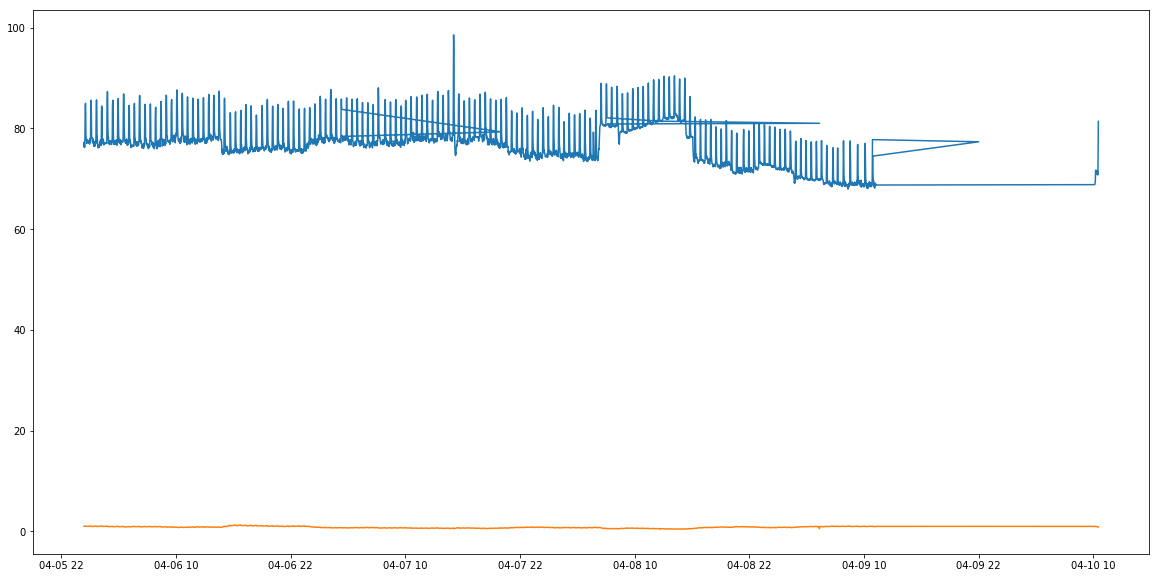

In [96]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(univariate_data_drop_zero)
plt.plot(predictions_ARIMA)

In [42]:
# predictions_ARIMA = np.exp(predictions_ARIMA_log)
# print(predictions_ARIMA_log)
# plt.plot(diff_log_univariate_datae_data)
# plt.plot(predictions_ARIMA)
# plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - diff_log_univariate_data)**2)/len(diff_log_univariate_data)))

In [83]:
def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.95)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    train_data = dataset[0:NumberOfElements]
    test_data = dataset[NumberOfElements:len(dataset)]
    
    return train_data, test_data

train_set, test_set = make_dataset(univariate_data_drop_zero)
print('train_set shape: ', train_set.shape)
print('test_set shape: ', test_set.shape)

dataset length:  4999
Number of Elements for training:  4749
train_set shape:  (4749, 1)
test_set shape:  (250, 1)


In [84]:
Actual = [x for x in train_set]
Predictions = list()

In [85]:
#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
#     print('from function screaming')
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [86]:
count_1=1
for timepoint in range(len(test_set)):
#     print('I am in for loop')
    ActualValue =  test_set[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 2,1,2)
    print('count=%d, Actual=%f, Predicted=%f' % (count_1 ,ActualValue, Prediction))
    count_1+=1
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

count=1, Actual=69.366113, Predicted=69.528409
count=2, Actual=69.054046, Predicted=69.521227
count=3, Actual=68.926324, Predicted=68.986463
count=4, Actual=68.937335, Predicted=69.012553
count=5, Actual=69.028250, Predicted=69.098513
count=6, Actual=69.004656, Predicted=69.216017
count=7, Actual=68.688184, Predicted=69.116856
count=8, Actual=68.610167, Predicted=68.669087
count=9, Actual=68.599157, Predicted=68.764269
count=10, Actual=68.558261, Predicted=68.783401
count=11, Actual=68.717441, Predicted=68.723697
count=12, Actual=68.873789, Predicted=68.979828
count=13, Actual=69.101862, Predicted=69.095014
count=14, Actual=68.464200, Predicted=69.326388
count=15, Actual=69.175475, Predicted=68.239680
count=16, Actual=68.691959, Predicted=69.720847
count=17, Actual=68.632817, Predicted=68.499588
count=18, Actual=69.049012, Predicted=68.768426
count=19, Actual=69.044608, Predicted=69.393365
count=20, Actual=70.769473, Predicted=69.100645
count=21, Actual=76.363722, Predicted=71.647163
c

count=171, Actual=68.879137, Predicted=68.016697
count=172, Actual=68.103372, Predicted=69.438915
count=173, Actual=68.905247, Predicted=67.826165
count=174, Actual=68.327042, Predicted=69.562080
count=175, Actual=68.097710, Predicted=68.121778
count=176, Actual=68.981377, Predicted=68.218089
count=177, Actual=68.359444, Predicted=69.634784
count=178, Actual=68.428023, Predicted=68.105812
count=179, Actual=68.684724, Predicted=68.670800
count=180, Actual=69.101862, Predicted=68.963438
count=181, Actual=69.077325, Predicted=69.401157
count=182, Actual=68.944570, Predicted=69.089530
count=183, Actual=68.753303, Predicted=68.929296
count=184, Actual=69.051214, Predicted=68.735629
count=185, Actual=69.393482, Predicted=69.294703
count=186, Actual=68.596955, Predicted=69.582045
count=187, Actual=69.100919, Predicted=68.194577
count=188, Actual=68.558261, Predicted=69.491332
count=189, Actual=69.155971, Predicted=68.311183
count=190, Actual=68.512646, Predicted=69.581562
count=191, Actual=69

In [87]:
print('Actual type: ',type(Actual),' size: ',len(Actual))
print('Predictions type: ',type(Predictions),' size: ',len(Predictions))
print('test_set type: ',type(test_set),' size: ',len(test_set))

Actual type:  <class 'list'>  size:  4999
Predictions type:  <class 'list'>  size:  250
test_set type:  <class 'numpy.ndarray'>  size:  250


In [88]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_set, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

print("size of prediction: ",len(Predictions))
print("size of actual: ",len(Actual))

Test Mean Squared Error (smaller the better fit): 0.999
size of prediction:  250
size of actual:  4999


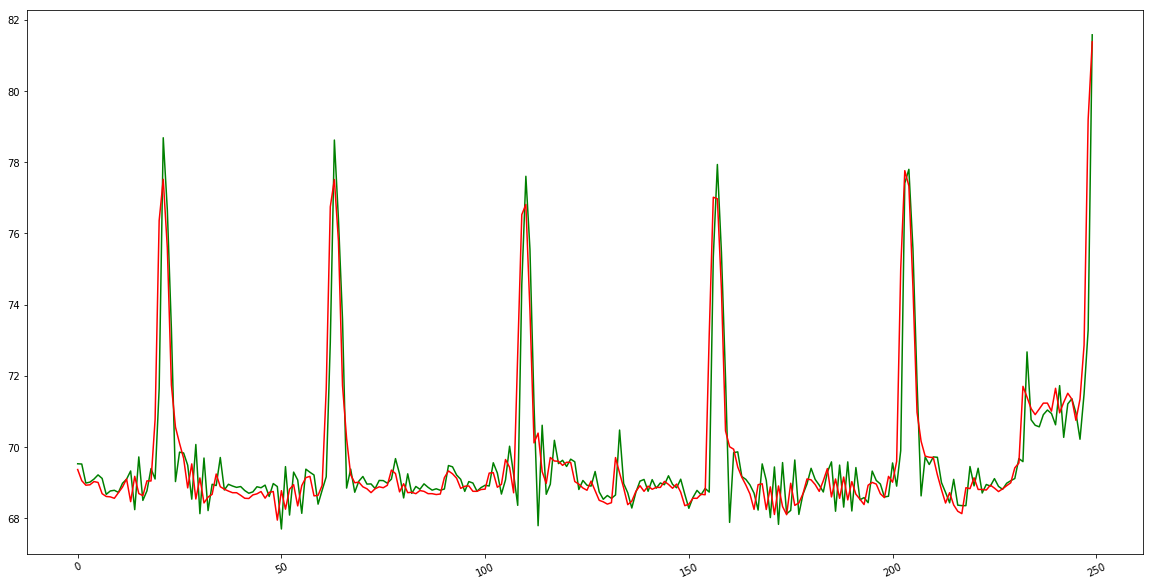

In [89]:
plt.plot(Predictions,color='green')
plt.plot(test_set,color='red')
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [95]:
# from statsmodels.tsa.vector_ar.var_model import VAR
# from random import random
# # contrived dataset with dependency
# # data = list()
# # for i in range(100):
# #     v1 = i + random()
# #     v2 = v1 + random()
# #     row = [v1, v2]
# #     data.append(row)
# # fit model
# model = VAR(train_set, test_set)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.forecast(model_fit.y, steps=1)
# print(yhat)